In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from scipy.stats import ks_2samp
%matplotlib inline
plt.style.use('ggplot')

In [2]:
data = pd.read_csv("./all_data_minmax.csv", index_col=0)
lab_columns = data.columns.values[1:]

In [ ]:
data

In [3]:
l = 'LACTATE'
LOS_med = data['los'].dropna().median()
cond_less = (data.mort_icu==0) & (data.los < LOS_med)
n_nonsurv = data[l.lower()+'_min'][data.mort_icu==1].dropna().count()
n_less = data[l.lower()+'_min'][cond_less].dropna().count()
quater = n_less / 4

In [4]:
print n_nonsurv
print n_less
print quater

2507
9148
2287


In [5]:
nonsurv = data[l.lower()+'_min'][data.mort_icu==1].dropna()

In [6]:
nonsurv.shape

(2507,)

In [7]:
first_quater = data.sort_values(by=['los'])[l.lower()+'_min'][cond_less].dropna().head(quater)

In [8]:
first_quater.shape

(2287,)

In [9]:
sec_quater = data.sort_values(by=['los'])[l.lower()+'_min'][cond_less].dropna()[quater:quater*2]

In [10]:
sec_quater.shape

(2287,)

In [11]:
third_quater = data.sort_values(by=['los'])[l.lower()+'_min'][cond_less].dropna()[quater*2:quater*3]

In [12]:
third_quater.shape

(2287,)

In [13]:
fourth_quater = data.sort_values(by=['los'])[l.lower()+'_min'][cond_less].dropna()[quater*3:]

In [14]:
fourth_quater.shape

(2287,)

In [15]:
first_quater.values.sort()
nonsurv.values.sort()

In [16]:
non = pd.Series(nonsurv.values, name='Non-survival')
first = pd.Series(first_quater.values, name='First Quarter')

In [17]:
df = first.to_frame().join(non.to_frame())
#first_quater
#non
#df = df.divide(df.sum(axis=1), axis=0)

In [18]:
range1 = max(df['Non-survival'].max(), df['First Quarter'].max())
range2 = min(df['Non-survival'].min(), df['First Quarter'].min())

In [19]:
x_range = np.linspace(range1, range2, num=50)

In [20]:
x_range = np.sort(x_range)

In [23]:
x_range

In [24]:
for x, i in enumerate(x_range[:-1]):
    #pass
    print i, x_range[x+1]

In [25]:
_df = pd.DataFrame(columns=['Non-survival', 'First Quarter', 'Second Quarter', 'Third Quarter', 'Fourth Quarter'])

In [26]:
_df['range'] = x_range

In [27]:
x_range = np.array(x_range)

In [28]:
for index, row in _df.iterrows():
    count_non = 0
    count_1st = 0
    count_2nd = 0
    count_3rd = 0
    count_4th = 0 
    if row['range'] != 12.3:
        for i in nonsurv.values:
            if i >= row['range'] and i < _df.iloc[index+1]['range']:
                count_non += 1 
    if row['range'] != 12.3:
        for i in first_quater.values:
            if i >= row['range'] and i < _df.iloc[index+1]['range']:
                count_1st += 1 
    if row['range'] != 12.3:
        for i in sec_quater.values:
            if i >= row['range'] and i < _df.iloc[index+1]['range']:
                count_2nd += 1
    if row['range'] != 12.3:
        for i in third_quater.values:
            if i >= row['range'] and i < _df.iloc[index+1]['range']:
                count_3rd += 1
    if row['range'] != 12.3:
        for i in fourth_quater.values:
            if i >= row['range'] and i < _df.iloc[index+1]['range']:
                count_4th += 1
    _df.set_value(index, 'Non-survival', count_non)
    _df.set_value(index, 'First Quarter', count_1st)
    _df.set_value(index, 'Second Quarter', count_2nd)
    _df.set_value(index, 'Third Quarter', count_3rd)
    _df.set_value(index, 'Fourth Quarter', count_4th)

In [29]:
_df2 = _df.set_index(['range'])
#_df

In [30]:
_df2 = _df2[(_df2 != 0).all(1)]

In [31]:
#_df2

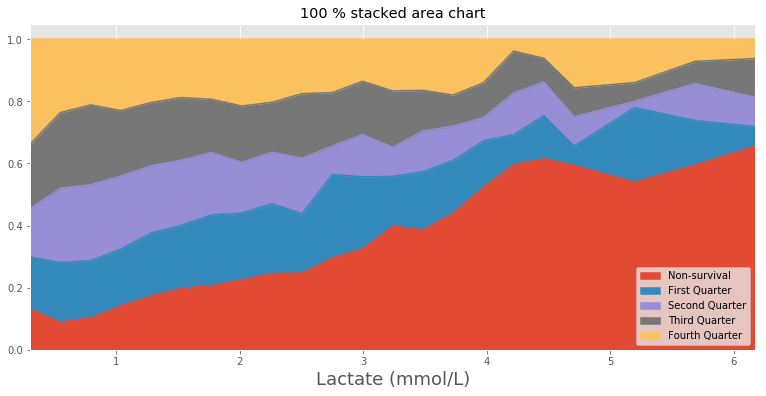

In [32]:
_df3 = _df2.divide(_df2.sum(axis=1), axis=0)
_df3.plot(kind='area', stacked=True, title='100 % stacked area chart', figsize=(13, 6))
fig = plt.gcf()
ax = plt.gca()
plt.xlabel('Lactate (mmol/L)', fontsize=18)
#_df2

In [ ]:
#_df2